# Gyroscope DDPG reward function testing (spinup library)

In [4]:
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
from os import path
from scipy.integrate import solve_ivp
import pandas as pd

import gym_gyroscope_env
import spinup
import torch
from functools import partial

from custom_functions.custom_functions import env_fn 
from custom_functions.custom_functions import create_env
from custom_functions.custom_functions import load_agent
from custom_functions.custom_functions import test_agent
from custom_functions.custom_functions import plot_test
from custom_functions.custom_functions import evaluate_control
from custom_functions.custom_functions import read_progress

import random
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

## Plot rewards

iter1_base 1000
iter1_reward01 1000
iter1_reward02 1000
iter1_reward03 1000
iter1_rs01 1000
iter1_rs02 1000
iter1_gamma01 1000
iter1_gamma02 1000
iter1_polyak01 1000
iter1_polyak02 1000
iter1_lr01 1000
iter1_lr02 1000
iter1_bs01 1000
iter1_bs02 1000
iter1_ss01 1000
iter1_ss02 1000
iter1_noise01 1000
iter1_noise02 1000


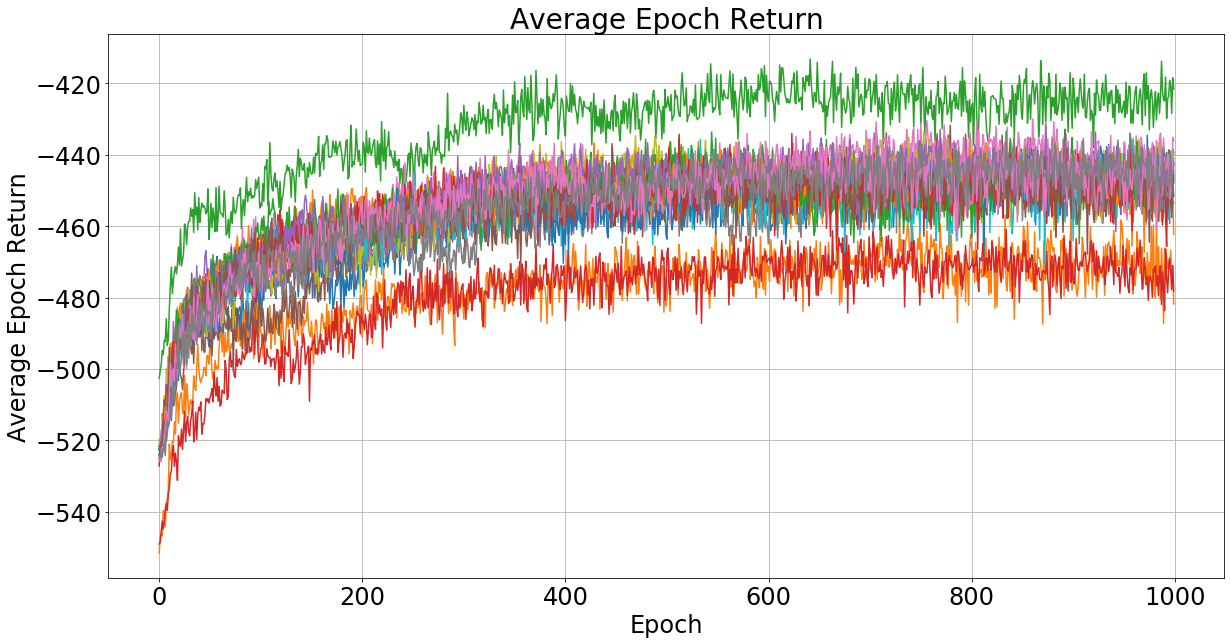

In [154]:
plt.figure(figsize=(20,10))
plt.title('Average Epoch Return',fontsize=28)
plt.xlabel('Epoch',fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel('Average Epoch Return',fontsize=24)
plt.yticks(fontsize=24)
plt.grid()

agent_paths = ['iter1_base','iter1_reward01','iter1_reward02','iter1_reward03',
              'iter1_rs01','iter1_rs02','iter1_gamma01','iter1_gamma02',
              'iter1_polyak01','iter1_polyak02','iter1_lr01','iter1_lr02',
              'iter1_bs01','iter1_bs02','iter1_ss01','iter1_ss02','iter1_noise01','iter1_noise02']

for agent_path in agent_paths[:]:
    progress = read_progress(agent_path)
    print(agent_path, len(progress))
    plt.plot(np.arange(progress.shape[0]), progress[:,1])
#     plt.fill_between(np.arange(progress.shape[0]), progress[:,3], progress[:,4], alpha=0.5)
#     plt.fill_between(np.arange(progress.shape[0]), progress[:,1]+progress[:,2], progress[:,1]-progress[:,2], alpha=0.5)

# plt.xlim([0,500])
# plt.ylim([-2000,0])
# plt.legend(agent_paths,fontsize=24)

## Test an agent

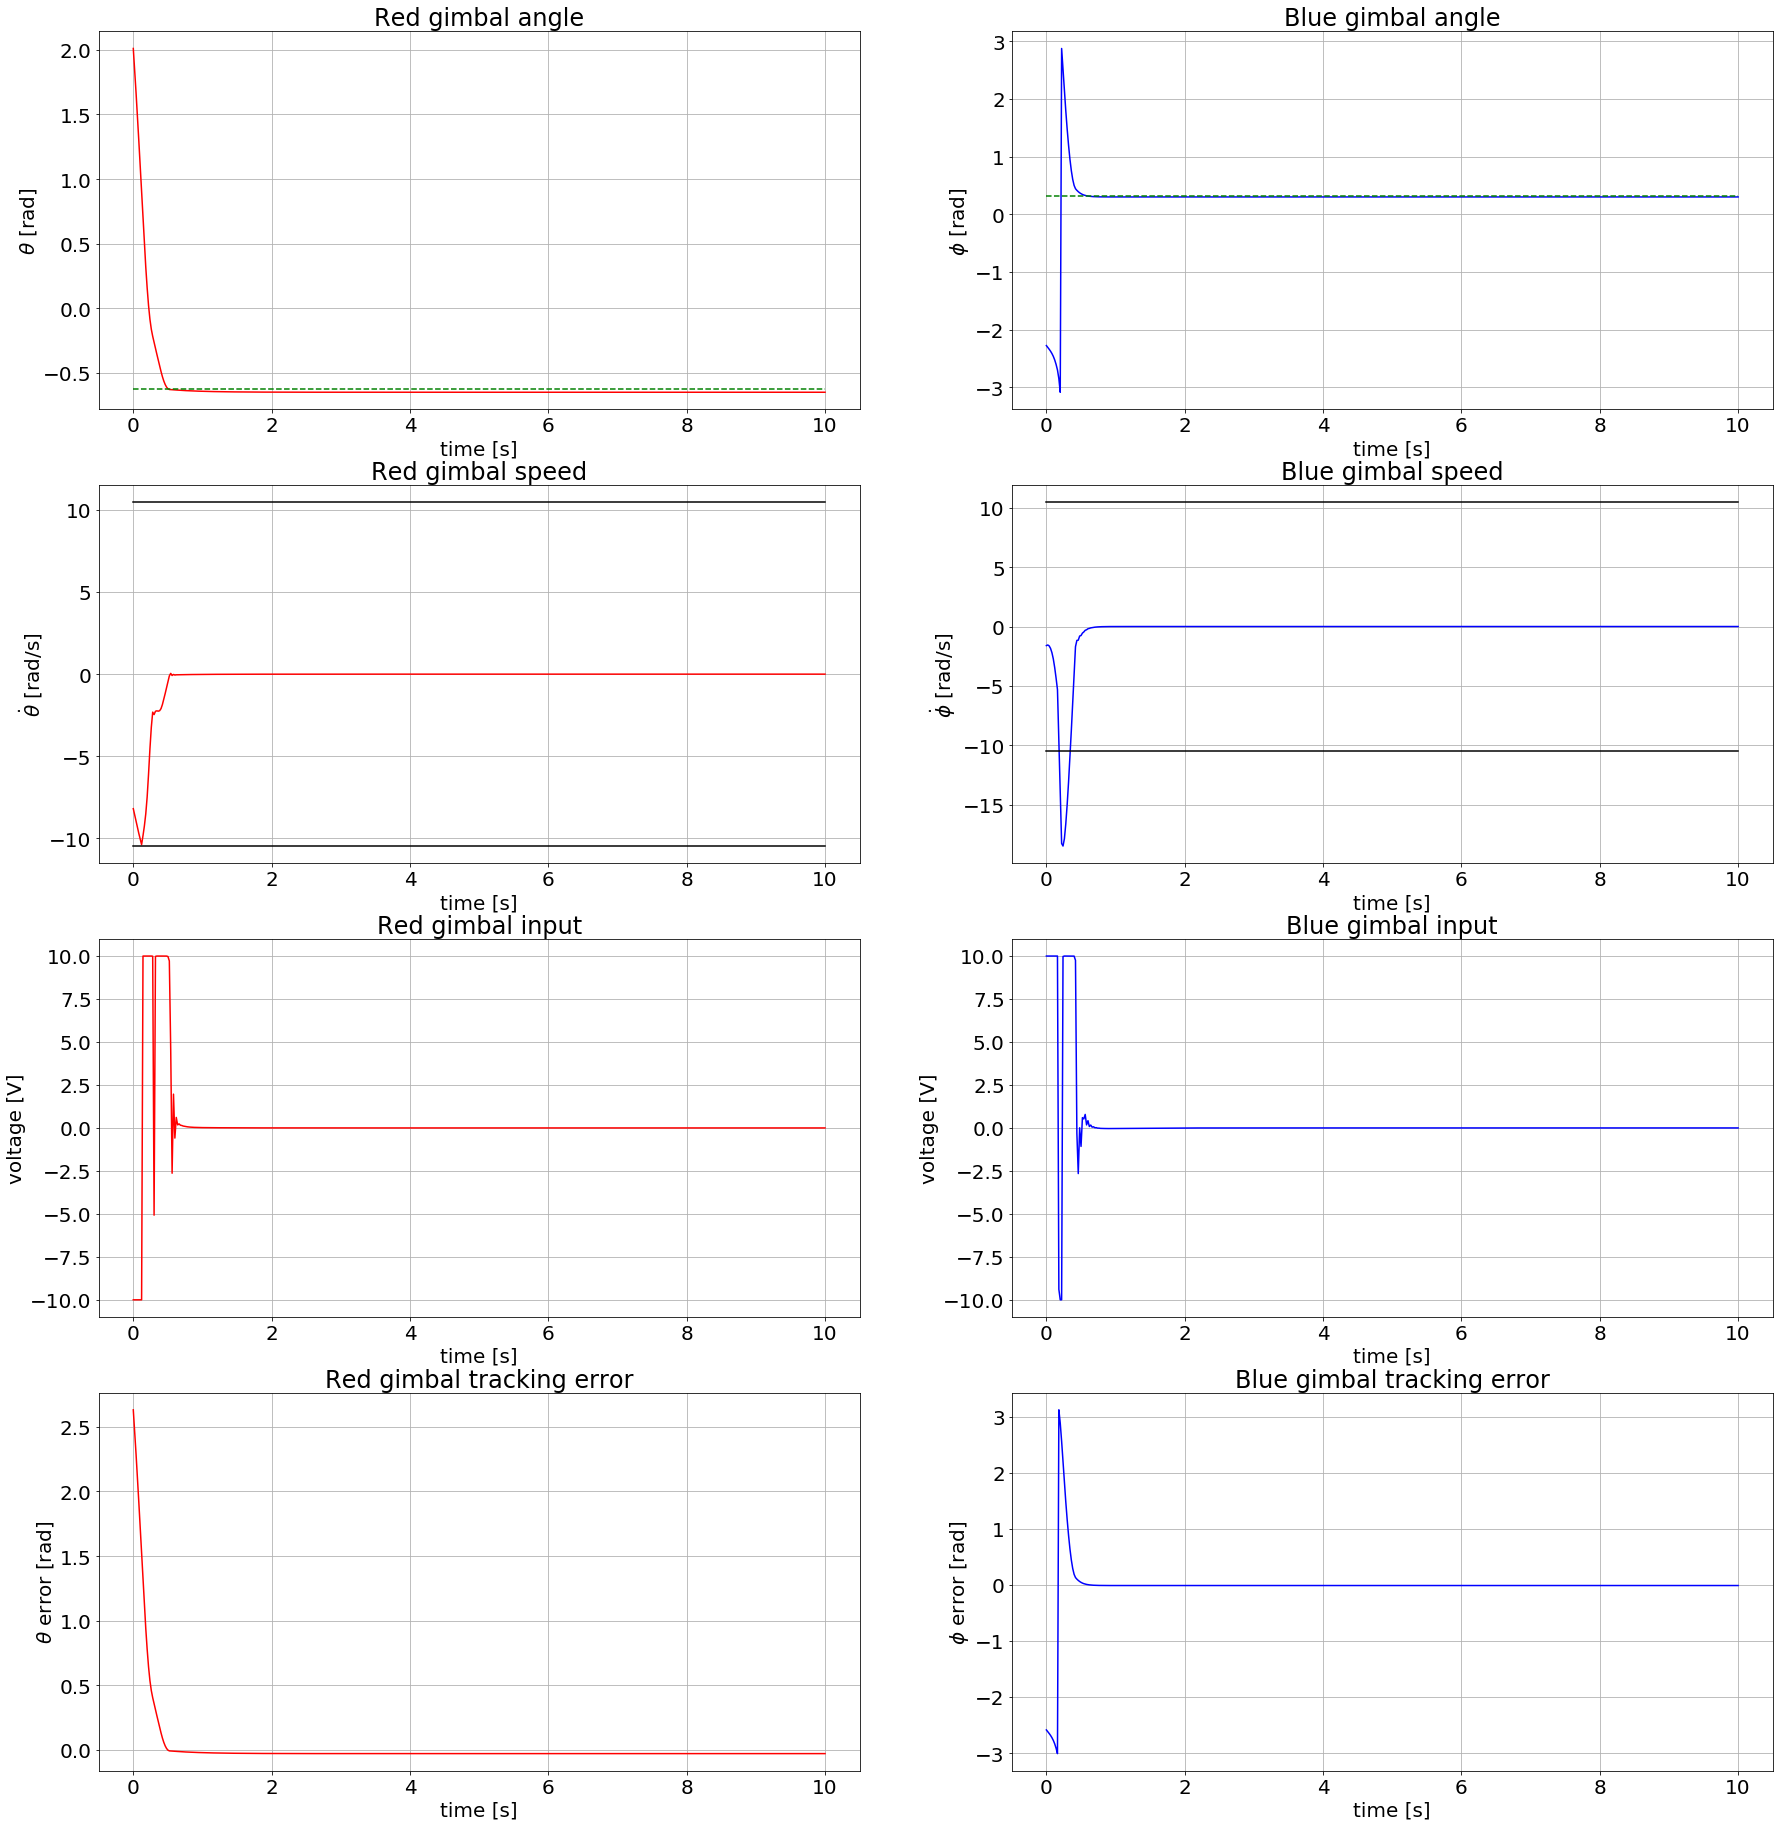

In [168]:
# Test paramaters
env_name = 'GyroscopeEnv-v1'
simu_args = {
    'dt': 0.02,
    'ep_len': 250,
    'seed': 2
}
reward_func = 'Power'
reward_args = {
    'qx1': 1, 
    'qx2': 0, 
    'qx3': 1, 
    'qx4': 0, 
    'pu1': 0, 
    'pu2': 0,
    'p': 0.05
}
# init_state = np.array([0,0,0,0,200/60*2*np.pi,45/180*np.pi,-60/180*np.pi])
env = create_env(env_name,simu_args,reward_func,reward_args,state=None)

agent_paths = ['iter1_base','iter1_reward01','iter1_reward02','iter1_reward03',
              'iter1_rs01','iter1_rs02','iter1_gamma01','iter1_gamma02',
              'iter1_polyak01','iter1_polyak02','iter1_lr01','iter1_lr02',
              'iter1_bs01','iter1_bs02','iter1_ss01','iter1_ss02','iter1_noise01','iter1_noise02']

agent = load_agent(agent_paths[0])
t_end = 10

score, state_record, obs_record, action_record, reward_record = test_agent(env,agent,t_end)
plot_test(state_record, action_record, t_end, 4)

## Evaluate control performance

In [152]:
iter1_metrics = pd.read_csv('iter1_metrics.csv')
pd.set_option('display.max_columns', None)
iter1_metrics

,Unnamed: 0,iter1_base,iter1_reward01,iter1_reward02,iter1_reward03,iter1_rs01,iter1_rs02,iter1_gamma01,iter1_gamma02,iter1_polyak01,iter1_polyak02,iter1_lr01,iter1_lr02,iter1_bs01,iter1_bs02,iter1_ss01,iter1_ss02,iter1_noise01,iter1_noise02
0,$\theta$ MAE (rad),0.2191,0.5111,0.2481,0.2469,0.1899,0.2210,0.2478,0.2366,0.2655,0.3287,0.1939,0.2815,0.2751,0.2617,0.2025,0.1806,0.2277,0.2373
1,$\phi$ MAE (rad),0.0946,0.0716,0.0987,0.0890,0.0865,0.0784,0.0738,0.0815,0.0854,0.0880,0.0719,0.0879,0.0811,0.1020,0.0862,0.0968,0.0749,0.0778
2,$\theta$ MSSE (rad),0.1068,0.3872,0.1181,0.1260,0.0833,0.0941,0.1231,0.1319,0.1528,0.1998,0.0922,0.1508,0.1486,0.1280,0.0941,0.0778,0.1057,0.1169
3,$\phi$ MSSE (rad),0.0391,0.0235,0.0439,0.0403,0.0385,0.0343,0.0236,0.0354,0.0319,0.0412,0.0253,0.0406,0.0225,0.0573,0.0361,0.0441,0.0285,0.0295
4,$\theta$ in bounds (%),96.0900,81.7400,94.4400,94.3700,95.4900,95.4700,94.3600,92.0800,92.1900,90.2500,93.7900,92.6700,92.1700,93.8600,95.9400,97.1800,95.1600,94.3400
5,$\phi$ in bounds (%),97.6200,98.7800,94.8900,98.4800,98.5100,99.1600,98.9000,98.1900,99.0700,97.3200,99.8900,97.4000,99.1100,94.6800,99.3800,97.4900,99.1600,98.5300
6,$\theta$ unsteady (%),0.5200,1.1700,0.7400,0.4100,0.3600,0.2500,0.7300,0.4300,0.7500,0.6600,0.1800,0.7500,1.0200,0.5100,0.4000,0.2700,0.3500,0.4100
7,$\phi$ unsteady (%),0.4100,0.4700,2.5700,0.3500,0.2400,0.2200,0.6100,1.1500,0.2700,1.1700,0.0300,0.5800,0.5100,0.8700,0.2600,1.2000,0.1200,1.1400
8,$\theta$ rise time (s),0.5558,0.7940,0.6259,0.7224,0.5297,0.6555,0.5664,0.6693,0.6413,0.7503,0.5682,0.7039,0.6325,0.6911,0.5931,0.5213,0.6029,0.6030
9,$\phi$ rise time (s),0.3052,0.2993,0.3125,0.3475,0.2816,0.2723,0.2827,0.2886,0.3224,0.2680,0.2997,0.2737,0.3140,0.2850,0.3232,0.3001,0.2947,0.2939


In [151]:
# metrics = pd.read_csv(agent_paths[0]+'_metrics.csv')
# for ap in agent_paths[1:]:
#     m = pd.read_csv(ap+'_metrics.csv')
#     metrics = pd.concat([metrics, m.iloc[:,1:]], axis=1)
# metrics = metrics.round(4)
# metrics.to_csv('iter1_metrics.csv',index=False)
# metrics